<center> <font color='green'> 

# World Happiness Analysis: Time Series Analysis 

</font> </center>

<font color='orange'> 

## Table of Contents 
01. Import libraries & data
02. Subsetting & Data Wrangling
03. Decomposition
04. Dickey_Fuller test
05. Differencing

</font>

## 1. Import Libraries & Data

In [51]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [52]:
# Configure API key 
quandl.ApiConfig.api_key = '7AqtoRXitupnqWPshUHZ'

In [53]:
# Import USA GDP data 
data = quandl.get('ODA/USA_NGDP_RPCH')

In [54]:
data.head(5)

,Value
Date,
1980-12-31,-0.257
1981-12-31,2.538
1982-12-31,-1.802
1983-12-31,4.584
1984-12-31,7.237


In [55]:
data.shape

(45, 1)

## 2. Subsetting & Data Wrangling

In [56]:
# Reset index to use the "Date" column as a filter

data_2 = data.reset_index()

In [57]:
data_2.head()

,Date,Value
0,1980-12-31,-0.257
1,1981-12-31,2.538
2,1982-12-31,-1.802
3,1983-12-31,4.584
4,1984-12-31,7.237


In [58]:
# Filter the Date from 1980-2020
data_sub = data_2.loc[(data_2['Date'] >= '1980-12-31') & (data_2['Date'] < '2019-12-31')]

In [59]:
data_sub.shape

(39, 2)

In [60]:
data_sub.head()

,Date,Value
0,1980-12-31,-0.257
1,1981-12-31,2.538
2,1982-12-31,-1.802
3,1983-12-31,4.584
4,1984-12-31,7.237


In [61]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) 
data_sub = data_sub.set_index('datetime') 
data_sub.drop(['Date'], axis=1, inplace=True) 
data_sub.head()

,Value
datetime,
1980-12-31,-0.257
1981-12-31,2.538
1982-12-31,-1.802
1983-12-31,4.584
1984-12-31,7.237


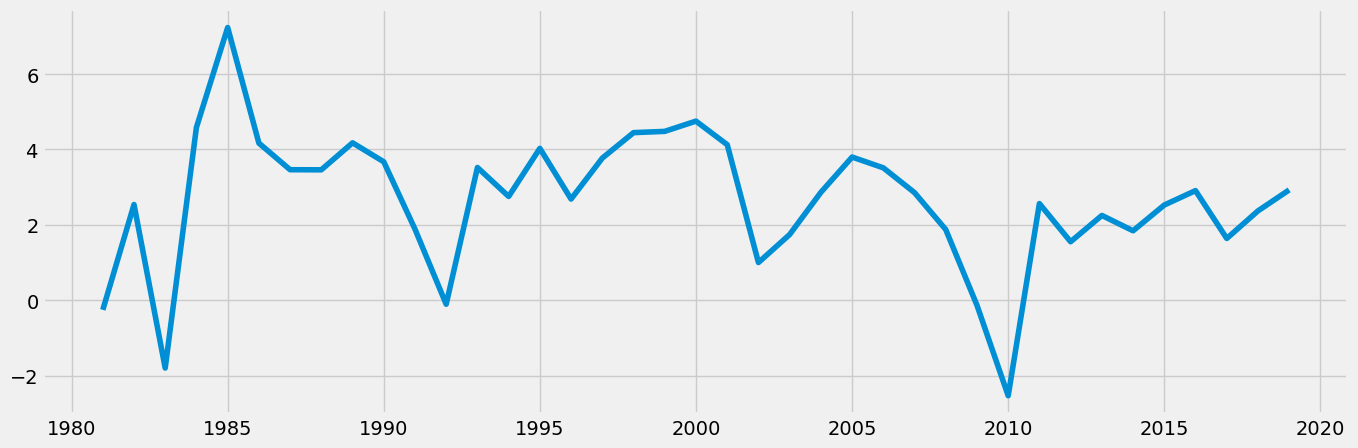

In [62]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(data_sub)

In [63]:
# Check for missing values
data_sub.isnull().sum() 

Value    0
dtype: int64

In [64]:
# Check for duplicates
data_sub[data_sub.duplicated()]

,Value
datetime,


I chose US GDP data from 1980 to 2022 because anything before could negatively influence the data as the economic condtions were different back then, and anything after would be a prediction as my 
World Happiness Data includes up to 2019.

## 3. Decomposition

In [65]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [66]:
# Define the figure size 

from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

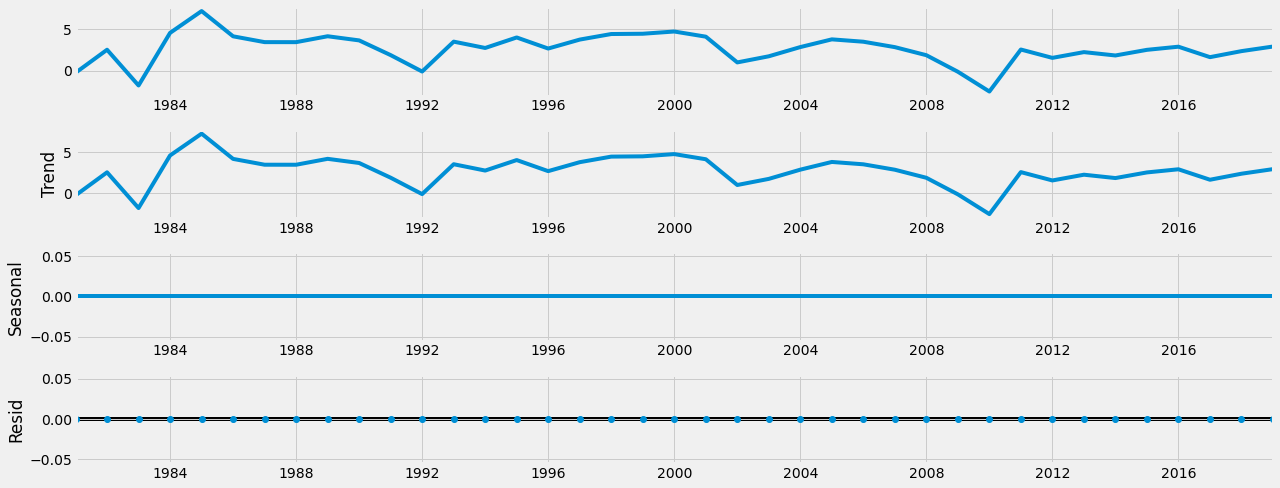

In [67]:
# Plot the separate components

decomposition.plot()
plt.show()

The trend is identical to the level which indicates that the data is smooth. Seasonality and residuals (noise) are both absent which also indicates that there's no variations the data.
Thus, the data is stationary.

## 4. Dickey-Fuller test

In [68]:
# import the adfuller function to perform the test
from statsmodels.tsa.stattools import adfuller 

# define the function to print the correct output from the array of numbers produced by the test
def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# apply the function to the data to conduct the test
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -4.441435
p-value                         0.000251
Number of Lags Used             0.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


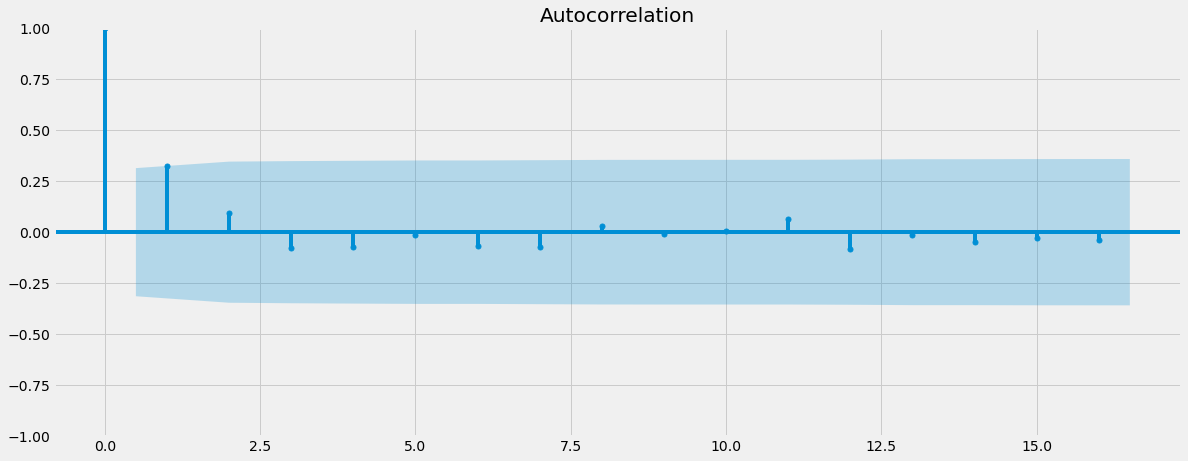

In [69]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_sub)
plt.show()

Test statistic is smaller than all Critical values so I can reject the null hypothesis of the data being non-stationary. 
P-value is less than 0.05 which must mean that the test result is significant.
Autocorrelation test shows that there's barely any lags that are significantly correlated with each other as many of them are within the confidence interval.

These results further confirm that the data is very stational. 

## 5. Differening

There's no need to stationalize the data because it is already stational